In [79]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
#Melihat gambaran data
df = pd.read_csv('/content/sample_data/Telco Customer Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,2386-LAHRK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
#First Data Profiling
profile = ProfileReport(df)
profile

# Berdasarkan profiling diatas, terdapat beberapa masalah antara lain 
    1. TotalCharges merupakan variable categorical dimana seharusnya merupakan variable numerik
    2. TotalCharges memiliki beberapa data kosong
    3. SeniorCitizen lebih baik untuk dijadikan variable boolean

In [82]:
#Memperbaiki kolom TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
df = df.replace(np.nan, 0, regex=True)
#Memperbaiki kolom SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].astype('bool')

df.sort_values(by=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,False,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
5347,9788-HNGUT,Male,False,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
6768,9739-JLPQJ,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4586,7569-NMZYQ,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [83]:
#Outlier check pada 3 variable numerik (Tenure, MonthlyCharges, TotalCharges)
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

print(detect_outlier(df['tenure']))
print(detect_outlier(df['MonthlyCharges']))
print(detect_outlier(df['TotalCharges']))

[]
[]
[]


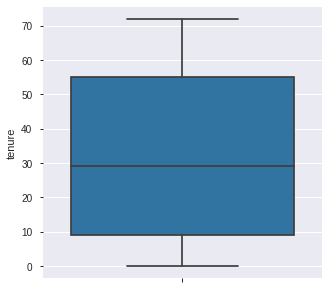

In [84]:
#Outlier check by boxplot
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y="tenure", data=df)

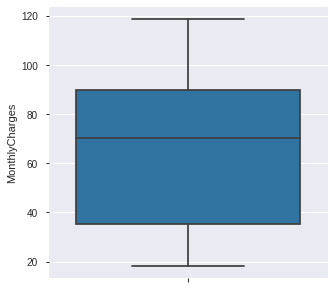

In [85]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y="MonthlyCharges", data=df)

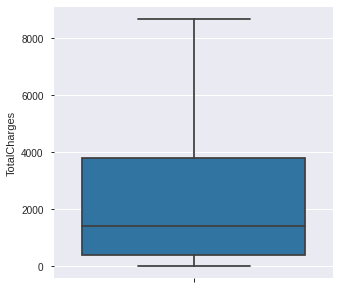

In [86]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y="TotalCharges", data=df)

Berdasarkan gambaran boxplot dan nilai Upper_bound/Lower_bound, tidak ditemukan adanya outlier/anomali pada ketiga variable numerik

# Visualisasi

1. Visualisasikan dengan grafik, berapa absolute number dan percentage user dari user churn dan non churn?

In [87]:
#Merubah variable Churn menjadi numerik
df['Churn'].replace({'Yes':1, 'No':0}, inplace=True)

In [88]:
def show_values_on_bars(ax):      
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

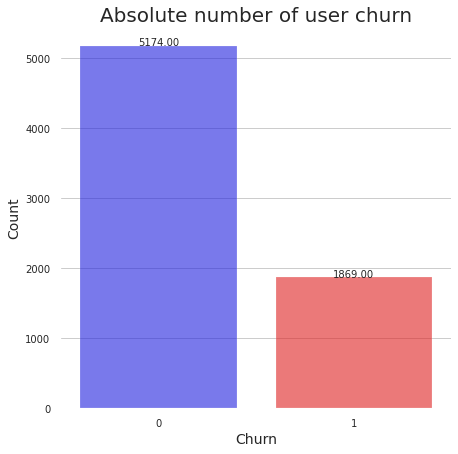

In [144]:
#Absolute Number
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.countplot(x= 'Churn',data=df, palette=['blue','red'], alpha= 0.6)
plt.xlabel("Churn", size=14)
plt.ylabel("Count", size=14)
plt.title("Absolute number of user churn", size=20)
show_values_on_bars(ax)

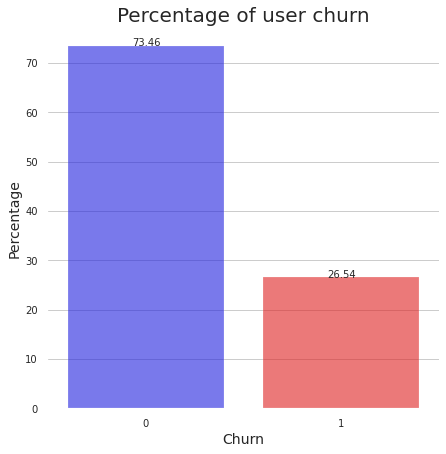

In [145]:
#Percentage
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="Churn", y="Churn", data=df, estimator=lambda x: len(x) / len(df) * 100,palette=['blue','red'], alpha= 0.6)
plt.xlabel("Churn", size=14)
plt.ylabel("Percentage", size=14)
plt.title("Percentage of user churn", size=20)
show_values_on_bars(ax)

2. Visualisasikan dengan grafik, bagaimana distribusi dari kolom TotalCharges jika di compare dengan kolom churn?


Text(0.5, 1.02, 'Total Charges Distribution by User Churn')

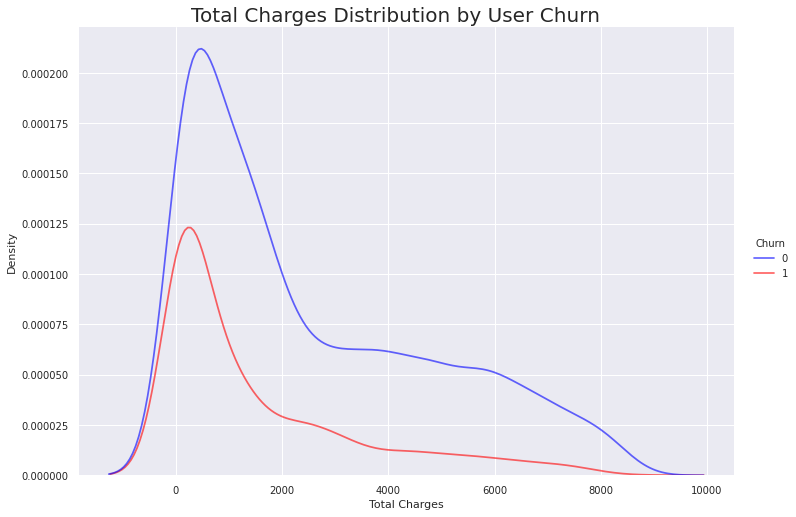

In [146]:
#Distribusi TotalCharges berdasarkan Churn
sns.set_style("darkgrid")
g = sns.displot(df,x='TotalCharges', kind= 'kde', hue= 'Churn', aspect= 1.5, height=7,palette=['blue','red'], alpha= 0.6)
g.set_axis_labels("Total Charges", "Density")
g.fig.suptitle("Total Charges Distribution by User Churn",y=1.02, size= 20)

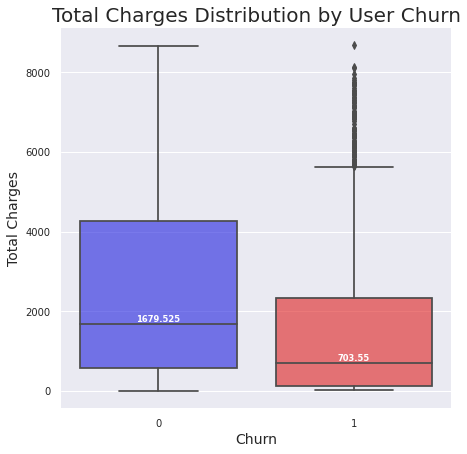

In [152]:
#Boxplot Total Charges berdasarkan Churn
fig, ax = plt.subplots(figsize=(7,7))
box_plot=sns.boxplot(x="Churn", y="TotalCharges", data=df, palette=['b','r'])
plt.xlabel("Churn", size=14)
plt.ylabel("Total Charges", size=14)
plt.title("Total Charges Distribution by User Churn", size=20)

for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .6))

medians = df.groupby(['Churn'])['TotalCharges'].median()
vertical_offset = df['TotalCharges'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')